In [1]:
### Let's get start

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
data=pd.read_csv("spam.tsv", sep="\t")

In [4]:
data.head()

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2


In [5]:
data["label"].value_counts()

ham     4825
spam     747
Name: label, dtype: int64

In [6]:
data.isnull().sum()

label      0
message    0
length     0
punct      0
dtype: int64

In [7]:
ham=data[data["label"]=="ham"].sample(data[data["label"]=="spam"].shape[0])

In [8]:
ham.shape

(747, 4)

In [9]:
spam=data[data["label"]=="spam"]

In [10]:
spam.shape

(747, 4)

In [11]:
### split data into train and test

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.pipeline import Pipeline

In [13]:
data1=ham.append(spam, ignore_index=True)

In [14]:
### Exploratory data Analysis

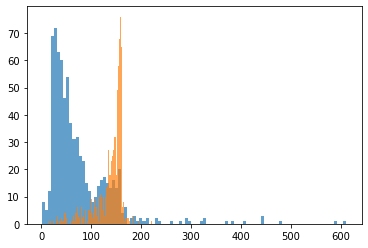

In [15]:
plt.hist(data1[data1['label']=='ham']['length'], bins = 100, alpha = 0.7)
plt.hist(data1[data1['label']=='spam']['length'], bins = 100, alpha = 0.7)

plt.show()

In [16]:
data1.shape

(1494, 4)

In [17]:
x_train,x_test,y_train,y_test=train_test_split(data1["message"], data1["label"], test_size=0.3, shuffle=True, random_state=0, stratify=data1["label"])

In [18]:
x_train.shape, x_test.shape

((1045,), (449,))

In [19]:
y_train.shape, y_test.shape

((1045,), (449,))

In [20]:
### bag of word creation

In [21]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [22]:
vectorizer = TfidfVectorizer()
x_train_vect = vectorizer.fit_transform(x_train)

In [23]:
x_train_vect.shape ## it has 1045 rows and 3724 cloumns this 3724 are the words

(1045, 3853)

In [24]:
### Pipeline and RF

In [25]:
clf=Pipeline([("tfidf", TfidfVectorizer()),("cls", RandomForestClassifier(n_estimators=100, n_jobs=-1))])

In [26]:
clf.fit(x_train, y_train)

Pipeline(memory=None,
         steps=[('tfidf',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='...
                 RandomForestClassifier(bootstrap=True, class_weight=None,
                                        criterion='gini', max_depth=None,
                                        max_features='auto',
                                        max_leaf_nodes=None,
                               

In [27]:
y_pred=clf.predict(x_test)

In [28]:
confusion_matrix(y_test, y_pred)

array([[224,   1],
       [ 24, 200]], dtype=int64)

In [29]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         ham       0.90      1.00      0.95       225
        spam       1.00      0.89      0.94       224

    accuracy                           0.94       449
   macro avg       0.95      0.94      0.94       449
weighted avg       0.95      0.94      0.94       449



In [30]:
accuracy_score(y_test, y_pred)

0.9443207126948775

In [31]:
clf.predict(["hi this is Asif"])

array(['ham'], dtype=object)

In [32]:
clf.predict(["hi, Asif you got free tickets for usa trip and you won prize 5000000"])

array(['spam'], dtype=object)

In [33]:
clf.predict(["you have got free tickets to the USA this summer."])

array(['spam'], dtype=object)

In [34]:
#### SVM

In [35]:
clf1=Pipeline([("tfidf", TfidfVectorizer()),("clf", SVC(C=1000, gamma='auto'))])

In [36]:
clf1.fit(x_train, y_train)

Pipeline(memory=None,
         steps=[('tfidf',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('clf',
                 SVC(C=1000, cache_size=200, class_weight=None, coef0=0.0,
                     decision_function_shape='ovr', degree=3, gamma='aut

In [37]:
y_pred1=clf1.predict(x_test)

In [38]:
accuracy_score(y_test, y_pred1)

0.955456570155902

In [39]:
clf1.predict(["you have got free tickets to the USA this summer."])

array(['spam'], dtype=object)

In [40]:
clf1.predict(["hi, Asif you got free tickets for usa trip and you won prize 5000000"])

array(['spam'], dtype=object)

In [41]:
clf1.predict(["Dear Mohammed, Welcome to VelvetJobs Resume Builder and Job Matching Service. Click here to get back to your Resume anytime To get the best value out of the service, please complete your resume and upgrade to Premium membership to get full access to all advanced features including curated job openings. Sincerely, VelvetJobs Customer Service"])

array(['spam'], dtype=object)

In [42]:
clf1.predict(["Hello from education-ecosystem.com! You're receiving this e-mail because user itsmak has given yours as an e-mail address to connect their account. To confirm this is correct, go to "])

array(['ham'], dtype=object)